<a href="https://colab.research.google.com/github/CSID-DGU/2024-02-CSC4004-1-1-BabsangLab/blob/ai-model/FoodDetectionAndClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ikitcheng/food-detection-yolov5.git
%cd food-detection-yolov5


Cloning into 'food-detection-yolov5'...
remote: Enumerating objects: 3191, done.
remote: Counting objects: 100% (3191/3191), done.
remote: Compressing objects: 100% (1468/1468), done.
remote: Total 3191 (delta 1576), reused 3182 (delta 1574), pack-reused 0 (from 0)
Receiving objects: 100% (3191/3191), 364.64 MiB | 24.39 MiB/s, done.
Resolving deltas: 100% (1576/1576), done.
/content/food-detection-yolov5


In [ ]:
!pip install -r requirements.txt


  Cloning https://github.com/baxterisme/pytube to /tmp/pip-req-build-apb6c6tm
  Running command git clone --filter=blob:none --quiet https://github.com/baxterisme/pytube /tmp/pip-req-build-apb6c6tm
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/baxterisme/pytube /tmp/pip-req-build-apb6c6tm did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/baxterisme/pytube /tmp/pip-req-build-apb6c6tm did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
# YOLOv5 가중치 다운로드
!curl -L -o yolov5s.pt https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5s.pt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14.0M  100 14.0M    0     0  9304k      0  0:00:01  0:00:01 --:--:-- 39.2M


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-12 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 194x259 2 bowls, 1 vase
Speed: 6.0ms pre-process, 81.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)


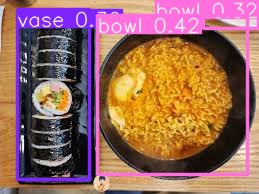

In [46]:
import torch
import matplotlib.pyplot as plt

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# 이미지 탐지 함수
def detect_food(img_path):
    results = model(img_path)  # 이미지에서 음식 탐지
    results.print()
    results.show()   # 탐지 결과 이미지 출력

    img = results.render()[0]
    plt.imshow(img)
    plt.axis('off')
    plt.show()

img_path = '/content/drive/MyDrive/a.jpg'  # 테스트할 이미지 경로
detect_food(img_path)


In [47]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
import os

# 한식 데이터셋으로 직접 학슶 ㅣ킨 InceptionV3 모델 load
inception_model_path = '/content/drive/MyDrive/KoreanFoodClassificationModel/final_model.h5'
inception_model = load_model(inception_model_path)

class_names = [
    '가지볶음', '간장게장', '갈비구이', '갈비찜', '갈치구이', '갈치조림', '감자전', '감자조림', '감자채볶음',
    '갓김치', '건새우볶음', '경단', '계란국', '계란말이', '계란후라이', '고등어구이', '고등어조림', '고사리나물',
    '고추장진미채볶음', '곱창구이', '곱창전골', '과메기', '김밥', '김치볶음밥', '김치전', '김치찌개', '김치찜',
    '깍두기', '깻잎장아찌', '꼬막찜', '꽁치조림', '꽈리고추무침', '꿀떡', '나박김치', '누룽지', '닭갈비',
    '닭계장', '닭볶음탕', '더덕구이', '도라지무침', '도토리묵', '동그랑땡', '동태찌개', '된장찌개', '두부김치',
    '두부조림', '땅콩조림', '떡갈비', '떡국_만두국', '떡꼬치', '떡볶이', '라면', '라볶이', '막국수', '만두',
    '매운탕', '멍게', '메추리알장조림', '멸치볶음', '무국', '무생채', '물냉면', '물회', '미역국', '미역줄기볶음',
    '배추김치', '백김치', '보쌈', '부추김치', '북엇국', '불고기', '비빔냉면', '비빔밥', '산낙지', '삼겹살',
    '삼계탕', '새우볶음밥', '새우튀김', '생선전', '소세지볶음', '송편', '수육', '수정과', '수제비', '숙주나물',
    '순대', '순두부찌개', '시금치나물', '시래기국', '식혜', '알밥', '애호박볶음', '약과', '약식', '양념게장',
    '양념치킨', '어묵볶음', '연근조림', '열무국수', '열무김치', '오이소박이', '오징어채볶음', '오징어튀김',
    '우엉조림', '유부초밥', '육개장', '육회', '잔치국수', '잡곡밥', '잡채', '장어구이', '장조림', '전복죽',
    '젓갈', '제육볶음', '조개구이', '조기구이', '족발', '주꾸미볶음', '주먹밥', '짜장면', '짬뽕', '쫄면',
    '찜닭', '총각김치', '추어탕', '칼국수', '코다리조림', '콩국수', '콩나물국', '콩나물무침', '콩자반', '파김치',
    '파전', '편육', '피자', '한과', '해물찜', '호박전', '호박죽', '홍어무침', '황태구이', '회무침', '후라이드치킨',
    '훈제오리'
]


drive_save_path = '/content/drive/MyDrive/CroppedImages'
os.makedirs(drive_save_path, exist_ok=True)

# 이미지 분류 함수 (상위 5개 예측 결과 출력)
def classify_cropped_image(crop_img, save_path, crop_index):
    # 이미지 전처리
    img_array = cv2.resize(crop_img, (299, 299))
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # 예측 수행
    predictions = inception_model.predict(img_array)
    top_5_indices = np.argsort(predictions[0])[::-1][:5]  # 상위 5개 인덱스
    top_5_confidences = predictions[0][top_5_indices]  # 상위 5개 확률
    top_5_classes = [class_names[i] for i in top_5_indices]  # 상위 5개 클래스 이름

    # crop 된 이미지와 예측 결과 출력
    plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("상위 5개 예측 결과:")
    for i in range(5):
        print(f"{i + 1}: {top_5_classes[i]} ({top_5_confidences[i] * 100:.2f}%)")

    # crop 된 이미지 저장
    save_filename = os.path.join(save_path, f"cropped_img_{crop_index}.jpg")
    cv2.imwrite(save_filename, cv2.cvtColor(crop_img, cv2.COLOR_RGB2BGR))
    print(f"크롭된 이미지를 저장했습니다: {save_filename}")

# YOLO 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

# 탐지 및 분류 함수
def detect_and_classify_food(img_path):
    # 원본 이미지 load
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # YOLO 모델을 이용하여 음식 탐지
    results = model(img_path)
    results.print()  # 탐지 결과 출력

    # 탐지된 객체 각각에 대해 crop 후 분류 수행
    for idx, (*box, conf, cls) in enumerate(results.xyxy[0]):  # 탐지된 객체의 좌표 및 클래스 정보
        x1, y1, x2, y2 = map(int, box)
        crop_img = img_rgb[y1:y2, x1:x2]  # 탐지된 객체 crop

        # crop된 이미지 분류 및 출력, 저장
        classify_cropped_image(crop_img, drive_save_path, idx)

# 테스트 이미지 경로
img_path = '/content/drive/MyDrive/a.jpg'
detect_and_classify_food(img_path)



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-12 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 194x259 2 bowls, 1 vase
Speed: 6.0ms pre-process, 100.1ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
상위 5개 예측 결과:
1: 떡볶이 (90.33%)
2: 라면 (4.26%)
3: 양념게장 (1.79%)
4: 조기구이 (0.75%)
5: 떡꼬치 (0.68%)
크롭된 이미지를 저장했습니다: /content/drive/MyDrive/CroppedImages/cropped_img_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
상위 5개 예측 결과:
1: 수육 (9.15%)
2: 누룽지 (5.99%)
3: 오징어채볶음 (5.69%)
4: 물회 (4.06%)
5: 간장게장 (3.92%)
크롭된 이미지를 저장했습니다: /content/drive/MyDrive/CroppedImages/cropped_img_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
상위 5개 예측 결과:
1: 김밥 (81.44%)
2: 우엉조림 (18.56%)
3: 수정과 (0.00%)
4: 약식 (0.00%)
5: 나박김치 (0.00%)
크롭된 이미지를 저장했습니다: /content/drive/MyDrive/CroppedImages/cropped_img_2.jpg
